In [22]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *
from forward_propagation import *
from backward_propagation import *
from loss import *
from mini_batch import *

In [10]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


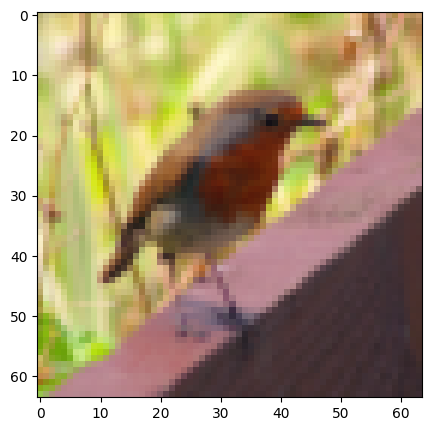

In [11]:
# Example of a picture
index = 10
plt.figure(figsize=(5,5))
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [12]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [13]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = (train_x_flatten/127.5) - 1
test_x = (test_x_flatten/127.5) - 1

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [14]:
layers_dims = [12288, 256, 8, 1] #  4-layer model

In [15]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations=1000, print_cost=False):

    np.random.seed(42)
    costs = []
    accuracy = []                  

    parameters = initialize_parameters_he(layers_dims)

    for i in range(0, num_iterations):
        seed = seed + 1
        mini_batch = mini_batches(X, Y, batch_size=64, random_seed=seed)
        for mb in mini_batch:
            AL, caches = forward(X, parameters)
            cost = binary_cross_entropy_loss(AL, Y)
            grads = backward(AL, Y, caches)
            update_parameters(parameters, grads,learning_rate)
            
            pred, acc = predict(X, Y, parameters, True)
            accuracy.append(acc)
            if print_cost and i % 100 == 0 or i == num_iterations - 1:
                print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            if i % 100 == 0 or i == num_iterations:
                costs.append(cost)
                
    return parameters, costs, accuracy

In [16]:
parameters, costs, accs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 500, print_cost = True)

Cost after iteration 0: 0.6575719101634235
Cost after iteration 100: 0.09858736463785928
Cost after iteration 200: 0.05455118876756179
Cost after iteration 300: 0.03860086075007272
Cost after iteration 400: 0.029595565929004836
Cost after iteration 499: 0.02321332419511923


In [17]:
pred_train, acc_train = predict(train_x, train_y, parameters, display=True)
print(acc_train)

0.9999999999999998


In [18]:
pred_test, acc_test = predict(test_x, test_y, parameters, display=True)
print(acc_test)

0.7000000000000001


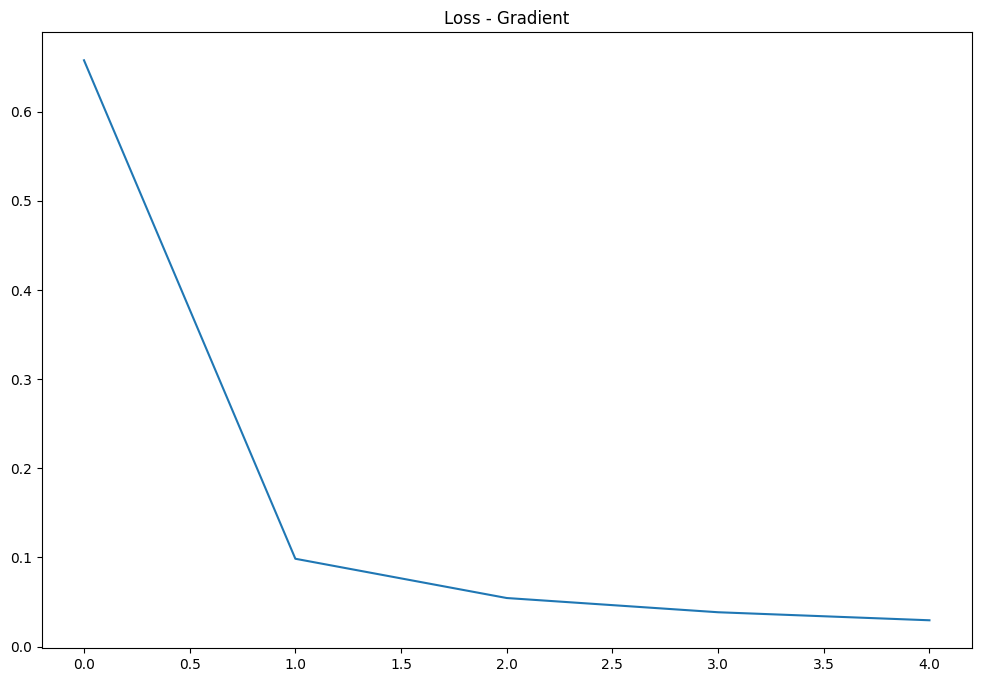

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Loss - Gradient')
plt.plot(costs)
plt.show()